# Binary linear classification vs. SVM

In [163]:
import numpy as np

from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def plot_margins(clf, x1, x2):
  w = clf.coef_[0]
  m = -w[0]/w[1]
  y1 = [m*x1[0]+(-1-clf.intercept_[0])/w[1], m*x1[1]+(-1-clf.intercept_[0])/w[1]]
  y2 = [m*x2[0]+(1-clf.intercept_[0])/w[1], m*x2[1]+(1-clf.intercept_[0])/w[1]]
  plot(x1, y1, 'k--')
  plot(x2, y2, 'k--', label = "margins")

def plot_decision_boundary(clf, x):
  w = clf.coef_[0]
  m = -w[0]/w[1]
  y = [m*x[0] + (-clf.intercept_[0] / w[1]), m*x[1] + (-clf.intercept_[0] / w[1])]
  plot(x, y, 'k', label = "decision boundary")

### 1.

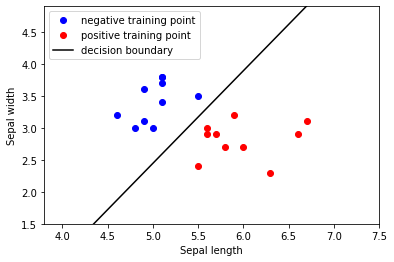

In [164]:
# get iris data and targets
iris_data, iris_target = datasets.load_iris(return_X_y=True) # [data, targets]

# Scale plots
x_min, x_max = iris_data[:100, 0].min() - 0.5, iris_data[:100, 0].max() + 0.5
y_min, y_max = iris_data[:100, 1].min() - 0.5, iris_data[:100, 1].max() + 0.5
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# first 100 entries only
iris_data = iris_data[:100]
iris_target = iris_target[:100]

# get training and testing set
iris_data_train, iris_data_test, iris_target_train, iris_target_test = train_test_split(iris_data[:, :2], iris_target, test_size=0.8, random_state=0)

# get linear classifier
LR_clf = LogisticRegression(random_state=0).fit(iris_data_train, iris_target_train)

# plot training data
init_pos, init_neg = True, True
for i in range(len(iris_data_train)):
  point = iris_data_train[i]
  if iris_target_train[i] == 0:
    if init_neg:
      plt.plot(point[0], point[1], 'bo', label = "negative training point")
      init_neg = False
    else:
      plt.plot(point[0], point[1], 'bo')
  else:
    if init_pos:
      plt.plot(point[0], point[1], 'ro', label = "positive training point")
      init_pos = False
    else:
      plt.plot(point[0], point[1], 'ro')

plot_decision_boundary(LR_clf, [x_min, x_max])
plt.legend()

### 2.

In [165]:
print("Training Accuracy = " + str(LR_clf.score(iris_data_train, iris_target_train)))
print("Testing Accuracy  = " + str(LR_clf.score(iris_data_test, iris_target_test)))

Training Accuracy = 1.0
Testing Accuracy  = 0.9875


### 3.

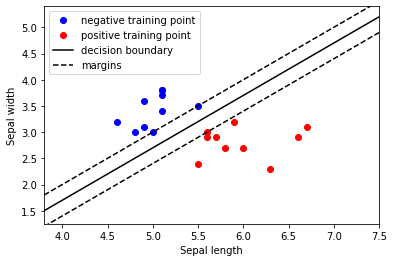

In [166]:
# get SVC classifier
SVC_clf = SVC(kernel='linear', C=500).fit(iris_data_train, iris_target_train) # based on sklearn documentation online

# plot prep
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min - 0.25, y_max + 0.5)

# plot training data
init_pos, init_neg = True, True
for i in range(len(iris_data_train)):
  point = iris_data_train[i]
  if iris_target_train[i] == 0:
    if init_neg:
      plt.plot(point[0], point[1], 'bo', label = "negative training point")
      init_neg = False
    else:
      plt.plot(point[0], point[1], 'bo')
  else:
    if init_pos:
      plt.plot(point[0], point[1], 'ro', label = "positive training point")
      init_pos = False
    else:
      plt.plot(point[0], point[1], 'ro')

plot_decision_boundary(SVC_clf, [x_min, x_max])
plot_margins(SVC_clf, [x_min, x_max], [x_min, x_max])

plt.legend()

### 4.

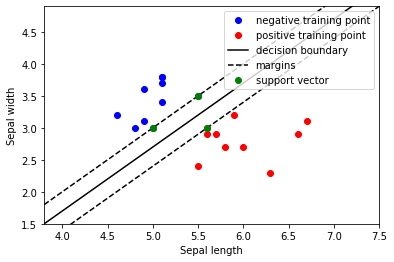

In [167]:
# get SVC classifier
SVC_clf = SVC(kernel='linear', C=500).fit(iris_data_train, iris_target_train) # based on sklearn documentation online

# plot prep
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot training data
init_pos, init_neg = True, True
for i in range(len(iris_data_train)):
  point = iris_data_train[i]
  if iris_target_train[i] == 0:
    if init_neg:
      plt.plot(point[0], point[1], 'bo', label = "negative training point")
      init_neg = False
    else:
      plt.plot(point[0], point[1], 'bo')
  else:
    if init_pos:
      plt.plot(point[0], point[1], 'ro', label = "positive training point")
      init_pos = False
    else:
      plt.plot(point[0], point[1], 'ro')

plot_decision_boundary(SVC_clf, [x_min, x_max])
plot_margins(SVC_clf, [x_min, x_max], [x_min, x_max])

# mark support vectors
init_support = True
for point in SVC_clf.support_vectors_:
  if init_support:
    plot(point[0], point[1], 'go', label = "support vector")
    init_support = False
  else:
    plot(point[0], point[1], 'go')

plt.legend()

Support vectors are identified above as those points lying directly on the margins. 
```
[ (w . x(i)) + b ] * y(i) = 1     # satisfies for support vector x(i)
```

### 5.

In [168]:
print("Training Accuracy = " + str(SVC_clf.score(iris_data_train, iris_target_train)))
print("Testing Accuracy  = " + str(SVC_clf.score(iris_data_test, iris_target_test)))

Training Accuracy = 1.0
Testing Accuracy  = 1.0


### 6.

```
(w . x) + b = ±1 
(w . x) = ±1 - b

For 2 points on opposite margins, x(i), x(j), and w (orthogonal to margin), the 
minimum distance between x(i), x(j) (the width of the margin) is given by:

(w . x(i))/||w|| - (w . x(j))/||w|| = 2/||w||


2/||w|| = get_margin(clf_svc)
```

In [169]:
print("Margin = " + str(get_margin(clf_svc)))

Margin = 0.42429264179457465


### 7.

In [170]:
print("The vector orthogonal to the SVM decision boundary is w =", clf_svc.coef_[0])

The vector orthogonal to the SVM decision boundary is w = [ 3.33331355 -3.33290415]


### 8.

Training Accuracy = 1.0
Testing Accuracy  = 1.0


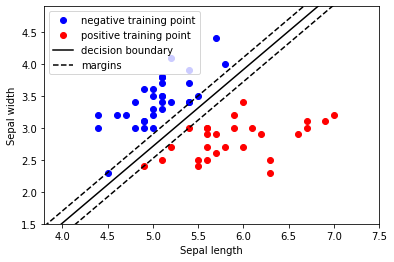

In [171]:
# prep plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# redefine training and testing set with new test_size
iris_data_train, iris_data_test, iris_target_train, iris_target_test = train_test_split(iris_data[:, :2], iris_target, test_size=0.4, random_state=0)

# get SVC classifier
SVC_clf = SVC(kernel='linear', C=500).fit(iris_data_train, iris_target_train)

# plot training data
init_pos, init_neg = True, True
for i in range(len(iris_data_train)):
  point = iris_data_train[i]
  if iris_target_train[i] == 0:
    if init_neg:
      plt.plot(point[0], point[1], 'bo', label = "negative training point")
      init_neg = False
    else:
      plt.plot(point[0], point[1], 'bo')
  else:
    if init_pos:
      plt.plot(point[0], point[1], 'ro', label = "positive training point")
      init_pos = False
    else:
      plt.plot(point[0], point[1], 'ro')

plot_decision_boundary(SVC_clf, [x_min, x_max])
plot_margins(SVC_clf, [x_min, x_max], [x_min, x_max])

print("Training Accuracy = " + str(SVC_clf.score(iris_data_train, iris_target_train)))
print("Testing Accuracy  = " + str(SVC_clf.score(iris_data_test, iris_target_test)))

plt.legend()

The above plot is run on the iris data training set with a `test_size = 0.4`. This training set contains more data points with respect to the plot in which the training data `test_size = 0.8`. The decision boundary is altered in this specific case as there are addtional training points with smaller margin than in the previous smaller training set.

The testing accuracy remains the same for the case where the iris data training set has `test_size = 0.4` and `test_size = 0.8` (1.0).

### 9.

The plots for the binary linear classifier and SVM decision boundaries are depicted in the above plots; the decision boundaries of these models are NOT the same.

### 10.

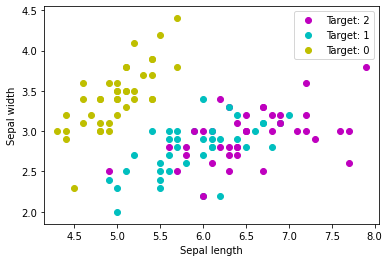

In [172]:
# redefine dataset
iris_data, iris_target = datasets.load_iris(return_X_y=True) # [data, targets]

# scaling for plots
x_min, x_max = iris_data[:150, 0].min() - .15, iris_data[:150, 0].max() + .15
y_min, y_max = iris_data[:150, 1].min() - .15, iris_data[:150, 1].max() + .15

# prep plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# first 150 entries
iris_data = iris_data[:150]
iris_target = iris_target[:150]

# redefine training and testing set
iris_data_train, iris_data_test, iris_target_train, iris_target_test = train_test_split(iris_data[:, :2], iris_target, test_size=0.8, random_state=0)

SVC_clf = SVC(kernel='linear', C=500).fit(iris_data_train, iris_target_train) # fit to training data

# display SVC on testing data
init_0, init_1, init_2 = True, True, True
for i in range(len(iris_data_test)):
  point = iris_data_test[i]
  if iris_target_test[i] == 0:
    if init_0:
      plt.plot(point[0], point[1], 'yo', label = "Target: 0")
      init_0 = False
    else:
      plt.plot(point[0], point[1], 'yo')
  elif iris_target_test[i] == 1:
    if init_1:
      plt.plot(point[0], point[1], 'co', label = "Target: 1")
      init_1 = False
    else:
      plt.plot(point[0], point[1], 'co')
  else:
    if init_2:
      plt.plot(point[0], point[1], 'mo', label = "Target: 2")
      init_2 = False
    else:
      plt.plot(point[0], point[1], 'mo')


plt.legend()

The above plot has `targets = {0, 1, 2}` ; the above test points are not linearly seperable into the three possible target values. It appears, however, that the test points for which `target = 1, 2` are seperable from the test points for which the `target = 0`.

```
Proposed modification, target class: {0, 1, 2}  ->  {0, {1, 2}}  ~>  {0, 1}
```

Training Accuracy = 1.0
Testing Accuracy  = 1.0


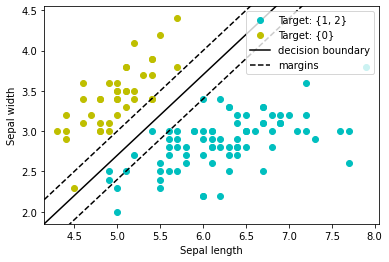

In [173]:
# prep plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# redefine target class
iris_target = list(map(lambda x: min(x, 1), iris_target))

# redefine training and testing sets
iris_data_train, iris_data_test, iris_target_train, iris_target_test = train_test_split(iris_data[:, :2], iris_target, test_size=0.8, random_state=0)

# get SVC classifier
SVC_clf = SVC(kernel='linear', C=500).fit(iris_data_train, iris_target_train) # fit to training data

# display SVC on testing data
init_0, init_1 = True, True
for i in range(len(iris_data_test)):
  point = iris_data_test[i]
  if iris_target_test[i] == 0:
    if init_0:
      plt.plot(point[0], point[1], 'yo', label = "Target: {0}")
      init_0 = False
    else:
      plt.plot(point[0], point[1], 'yo')
  elif iris_target_test[i] == 1:
    if init_1:
      plt.plot(point[0], point[1], 'co', label = "Target: {1, 2}")
      init_1 = False
    else:
      plt.plot(point[0], point[1], 'co')

plot_decision_boundary(clf_svc, [x_min, x_max])
plot_margins(clf_svc, [x_min, x_max], [x_min, x_max])

print("Training Accuracy = " + str(SVC_clf.score(iris_data_train, iris_target_train)))
print("Testing Accuracy  = " + str(SVC_clf.score(iris_data_test, iris_target_test)))

plt.legend()